import data and seperate x, y, train validation

In [12]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_validation = pd.read_csv('validation.csv')
df_test = pd.read_csv('test.csv')

# print(df_train.head())

X_train = df_train.iloc[:,range(0,35)]
y_train = df_train.iloc[:,35]
print(X_train)
# print(y_train.head())

X_validation = df_validation.iloc[:,range(0,35)]
y_validation = df_validation.iloc[:,35]
#print(X_validation.head())

X_test1 = df_test.iloc[:,range(0,35)]


        Id  Marital status  Application mode  Application order  Course  \
0     3222               1                 1                  1      14   
1     2388               1                 8                  4       9   
2     1865               1                12                  1      17   
3      652               1                12                  1      12   
4     4220               1                 1                  1      14   
...    ...             ...               ...                ...     ...   
2471  4286               1                 1                  1       6   
2472  4399               1                 1                  1      11   
2473  3526               2                12                  1       4   
2474  1050               1                 1                  1       2   
2475  1494               1                12                  1      12   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                         

correlations

<AxesSubplot: >

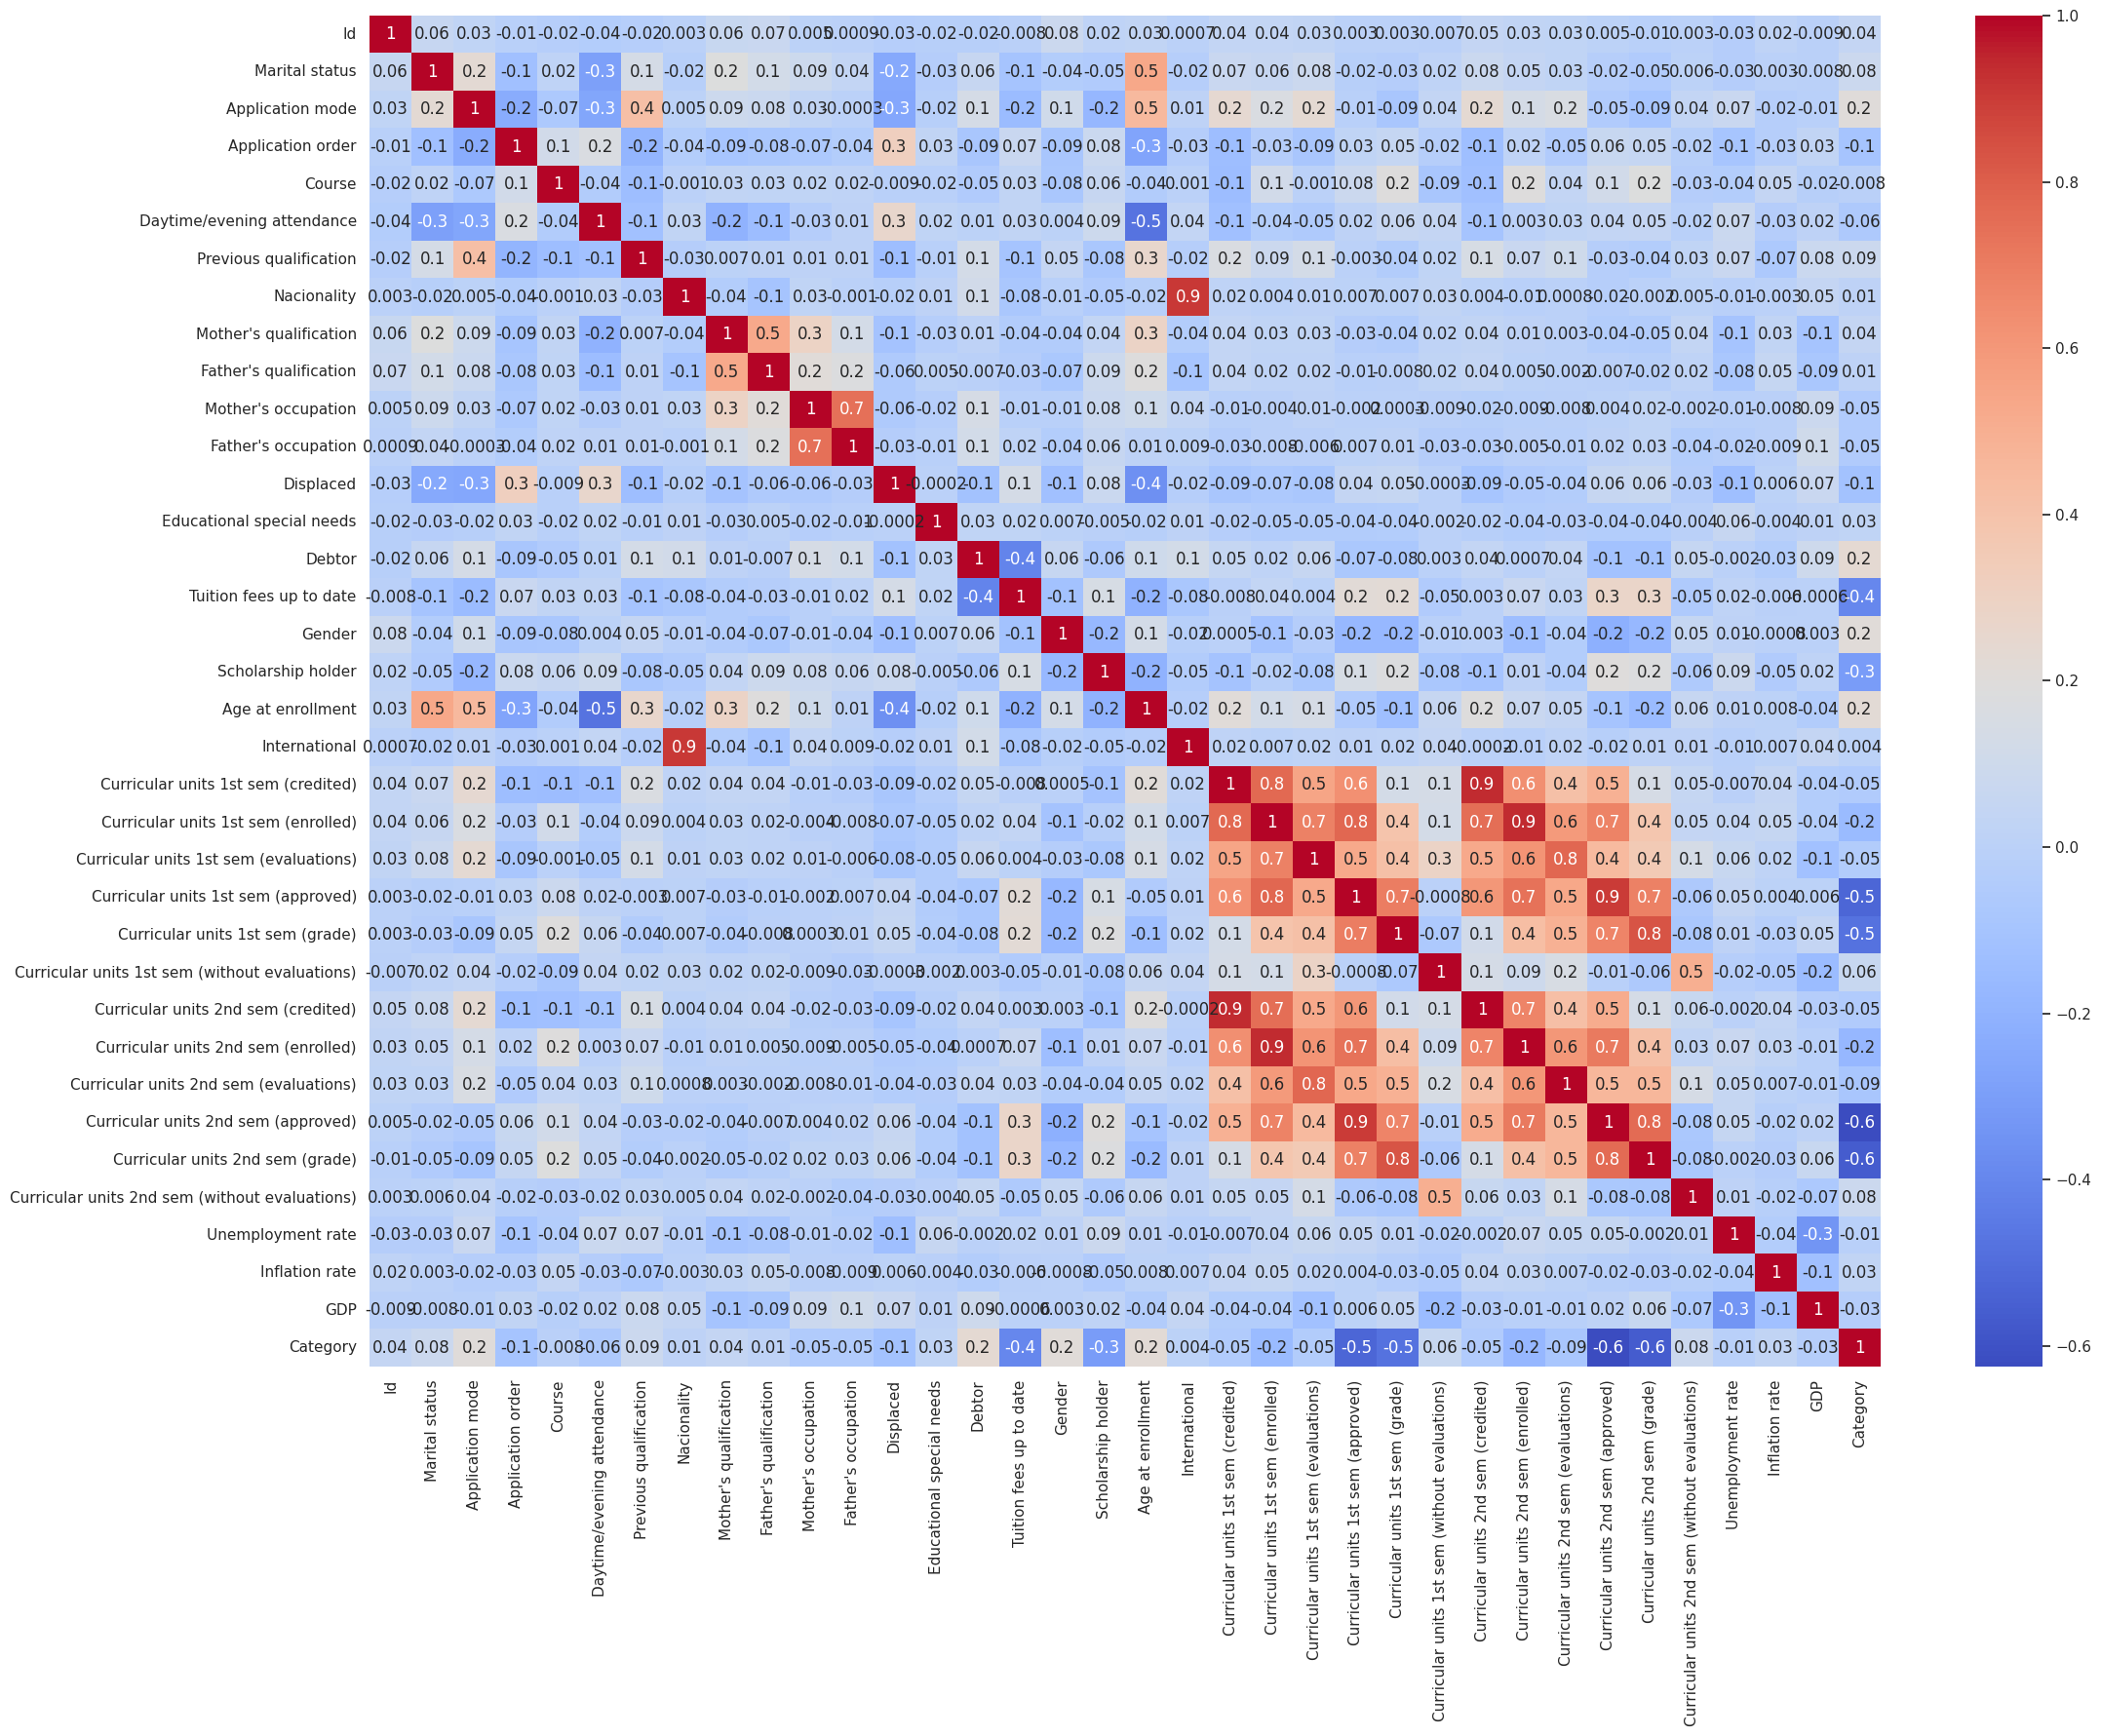

In [95]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

df_train = pd.read_csv('train.csv')
df_train = df_train.replace("Graduate", 1)
df_train = df_train.replace("Dropout", 3)
df_train = df_train.replace("Enrolled", 2)

plt.figure(figsize=(25,18))
sns.set_theme(style="white")
corr = df_train.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.1g')

corr without target

<AxesSubplot: >

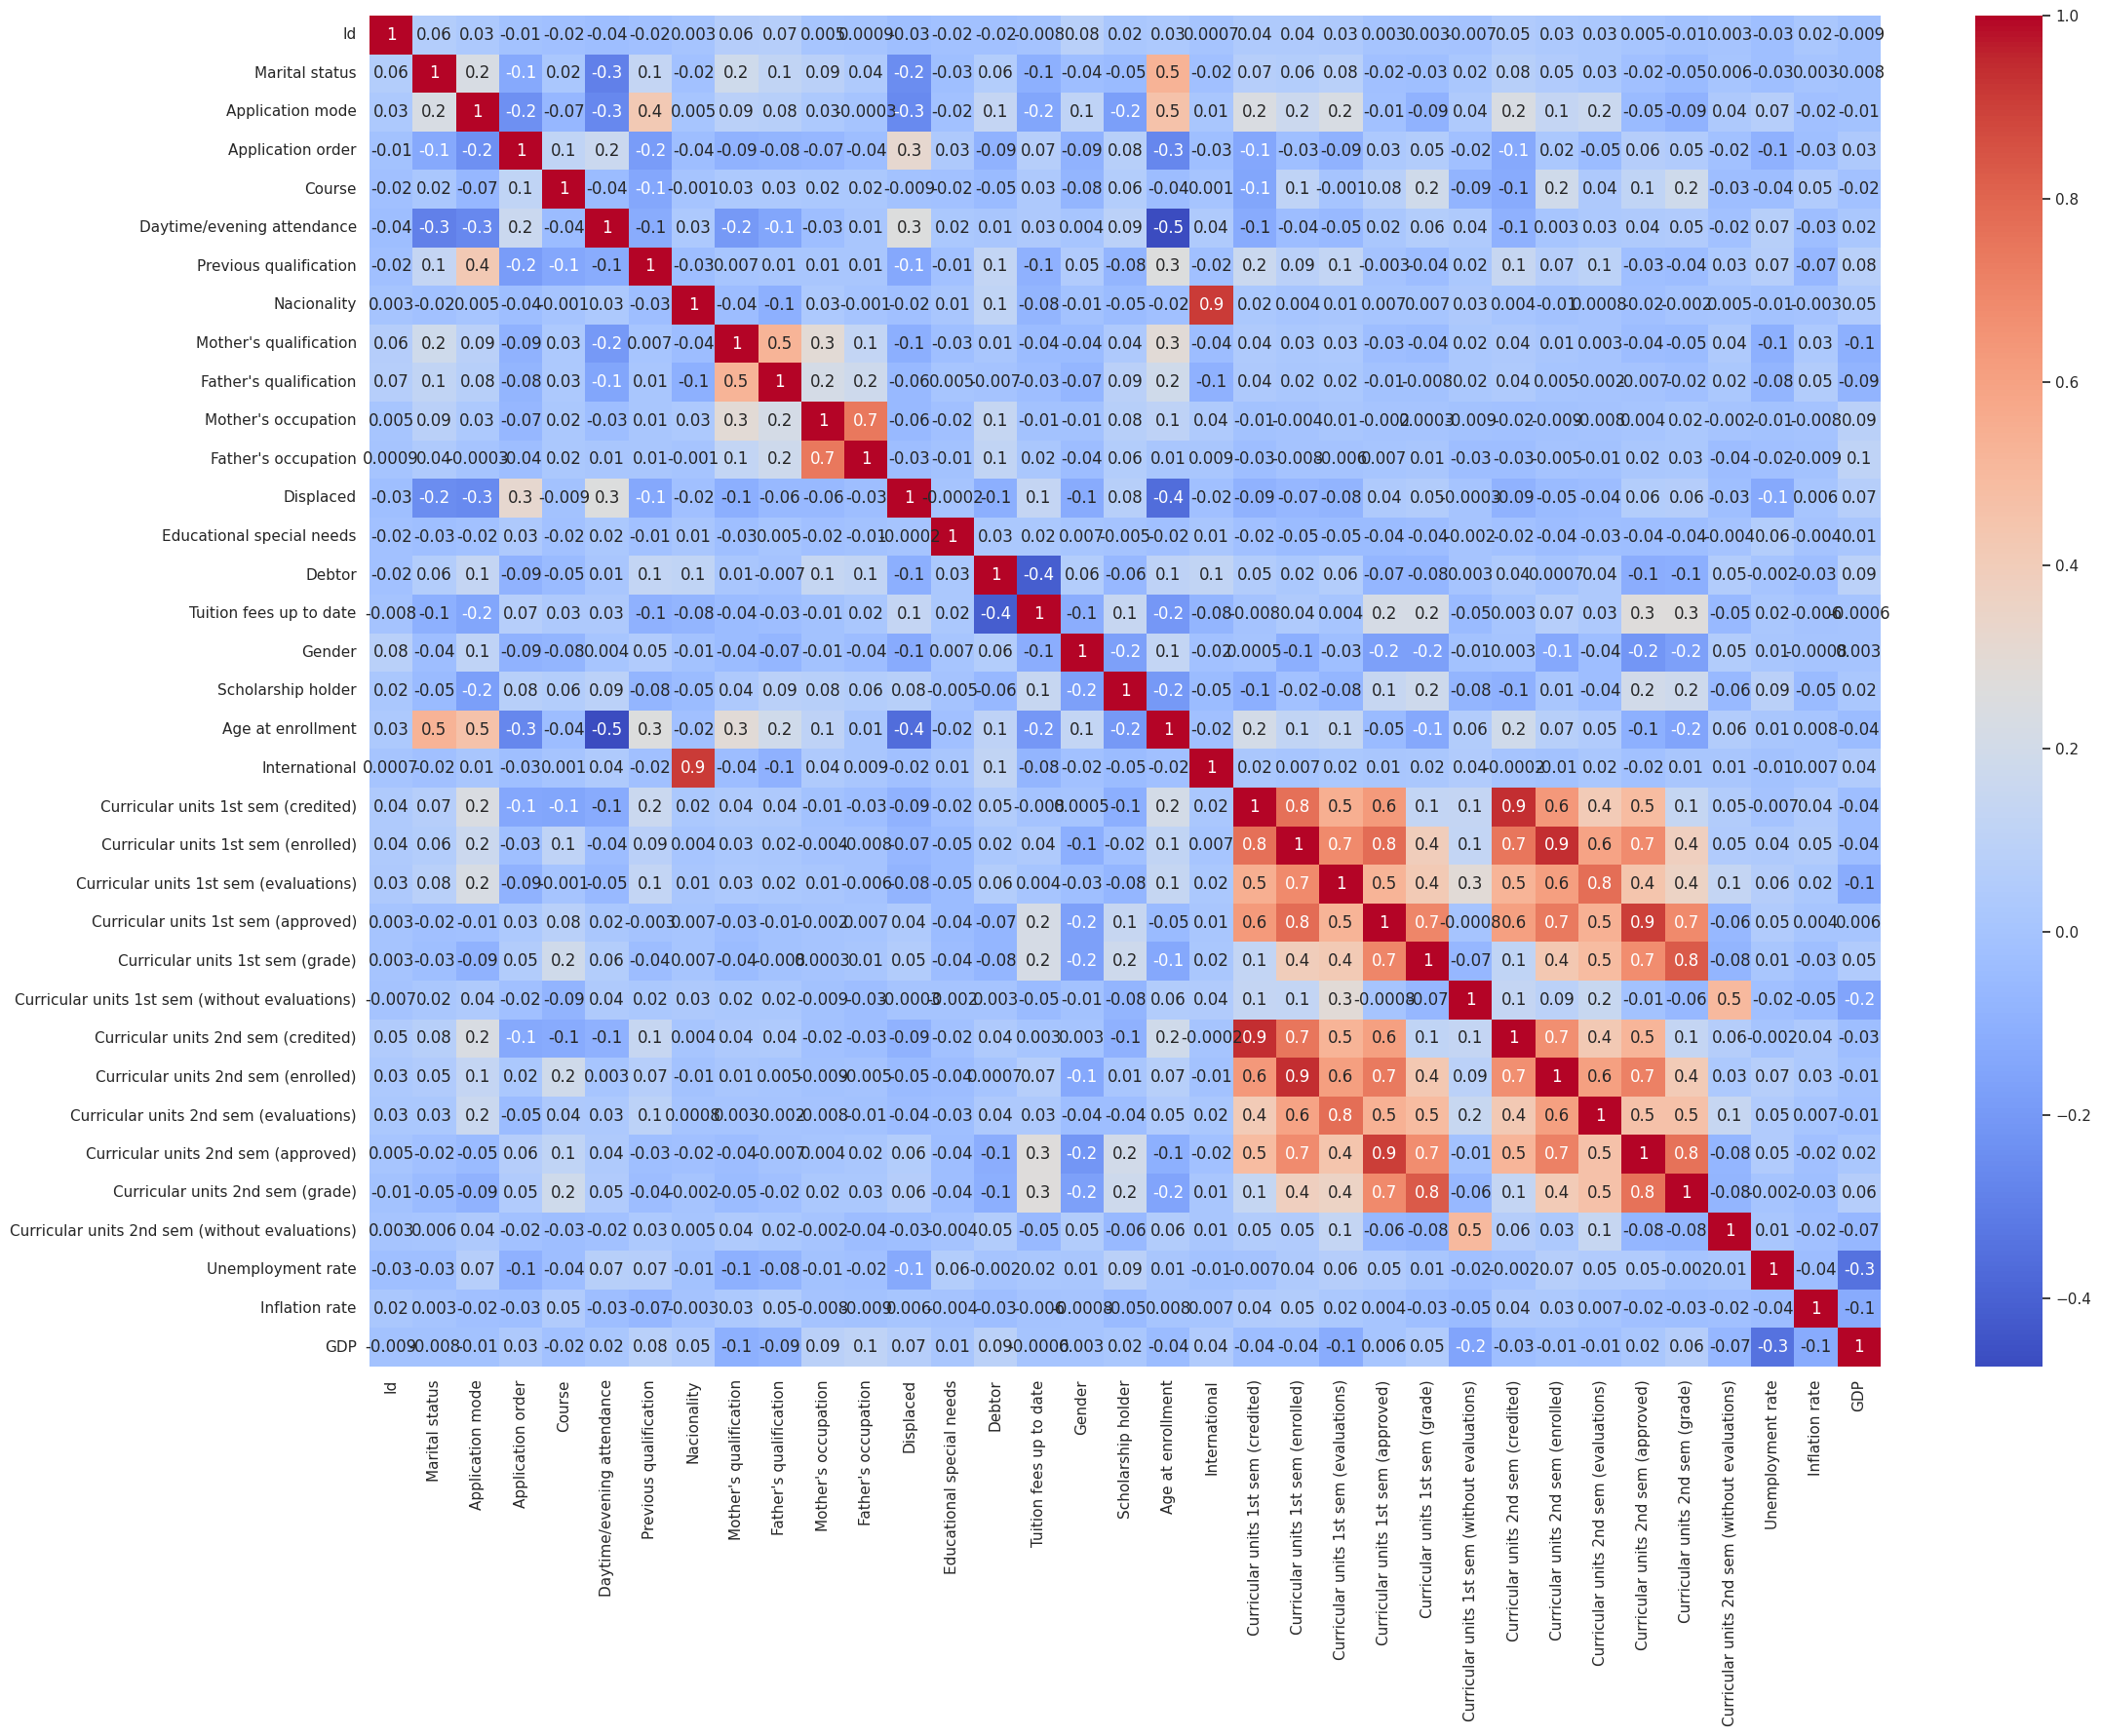

In [96]:
plt.figure(figsize=(25,18))
sns.set_theme(style="white")
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.1g')

features not selected:
ID, 

features selection

In [97]:
#X_train['Nacionality'].info()
# X_train['Nacionality'].value_counts(normalize=True)
# X_train['International'].value_counts(normalize=True)
# X_train['Curricular units 1st sem (approved)'].value_counts(normalize=True, sort=True)
# X_train['Curricular units 1st sem (credited)'].value_counts(normalize=True, sort=True)
# X_train['Curricular units 1st sem (enrolled)'].value_counts(normalize=True, sort=True)
X_train['Curricular units 1st sem (evaluations)'].value_counts(normalize=True, sort=True)



8     0.179321
7     0.157916
6     0.136107
10    0.086430
9     0.083603
0     0.080775
11    0.058966
5     0.046042
12    0.046042
13    0.034733
14    0.020194
15    0.014136
17    0.009693
16    0.009289
18    0.007674
19    0.006462
4     0.004039
21    0.003635
20    0.002423
24    0.001616
23    0.001212
2     0.001212
22    0.001212
3     0.001212
1     0.001212
25    0.001212
45    0.000808
32    0.000404
27    0.000404
31    0.000404
28    0.000404
29    0.000404
36    0.000404
26    0.000404
Name: Curricular units 1st sem (evaluations), dtype: float64

features selected

In [13]:
X_train = X_train.drop(["Id"], axis=1)
X_validation = X_validation.drop(["Id"], axis=1)
X_test = X_test1.drop(["Id"], axis=1)

print(X_train)

AttributeError: 'DataFrame' object has no attribute 'type'

PCA

In [99]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# # scaler1 = StandardScaler
# # scaler1.fit(X_train)
# # X_train = scaler1.transform(X_train)


# model = PCA()
# X_train = model.fit_transform(X_train)
# X_validation = model.fit_transform(X_validation)
# X_test = model.fit_transform(X_test)

# print(X_test)



ensemble

In [100]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

SEED = 1

lr = LogisticRegression()
knn = KNN()
dt = DecisionTreeClassifier()

classifiers = [('Logistic Regression', lr),('K Nearest Neighbours', knn),('Classification Tree', dt)]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)

    y_pred =clf.predict(X_validation)
    print(accuracy_score(y_validation,y_pred))

vc = VotingClassifier(estimators=classifiers)

vc.fit(X_train, y_train)
y_pred = vc.predict(X_validation)
print(accuracy_score(y_validation,y_pred))





/home/jack/students_dropout/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jack/students_dropout/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

0.759789156626506
0.6573795180722891
0.6844879518072289
0.7356927710843374


random forests

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=0.12)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_validation)
print(accuracy_score(y_validation,y_pred))

0.6957831325301205


polynominal regression

In [102]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
# from sklearn.linear_model import LinearRegression
# import math



# degree = 2

# polyreg=make_pipeline(
#     PolynomialFeatures(degree),
#     LinearRegression(),
# )

# polyreg.fit(X_train, y_train)

# y_pred = rf.predict(X_validation)
# print(accuracy_score(y_validation,y_pred))

boosting

In [103]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=6)
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=300)

adb_clf.fit(X_train, y_train)
y_pred = adb_clf.predict(X_validation)
print(accuracy_score(y_validation,y_pred))



0.7304216867469879


Stochastic GradientBoosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

sgbr = GradientBoostingClassifier(max_depth=4,subsample=0.7,max_features=0.8,n_estimators=200)

sgbr.fit(X_train, y_train)
y_pred = sgbr.predict(X_validation)
# print(accuracy_score(y_validation,y_pred))

y_pred_train = sgbr.predict(X_train)
y_pred_train= pd.DataFrame(y_pred_train)
y_pred= pd.DataFrame(y_pred)




y_test_pred =  sgbr.predict(X_test)

#print(y_test_pred)

# result= X_test1[['Id']]
# result['Category']= y_test_pred
# print(result.head)
# result.to_csv('submission_jx.csv',index=False)



make roc score

In [27]:
y_train_roc = y_train.replace("Graduate", 1)
y_train_roc = y_train.replace("Dropout", 0)
y_train_roc = y_train.replace("Enrolled", 1)

y_pred_train_roc = y_pred_train.replace("Graduate", 1)
y_pred_train_roc = y_pred_train.replace("Dropout", 0)
y_pred_train_roc = y_pred_train.replace("Enrolled", 1)

y_pred_roc = y_pred.replace("Graduate", 1)
y_pred_roc = y_pred.replace("Dropout", 0)
y_pred_roc = y_pred.replace("Enrolled", 1)

y_validation_roc = y_validation.replace("Graduate", 1)
y_validation_roc = y_validation.replace("Dropout", 0)
y_validation_roc = y_validation.replace("Enrolled", 1)

print(y_train)
print(y_train_roc)
# print(y_pred_train_roc)

# print(roc_auc_score(y_train_roc, y_pred_train))
# print(roc_auc_score(y_validation, y_pred))

0       Graduate
1        Dropout
2       Graduate
3       Graduate
4        Dropout
          ...   
2471    Graduate
2472    Graduate
2473     Dropout
2474    Graduate
2475     Dropout
Name: Category, Length: 2476, dtype: object
0       Graduate
1        Dropout
2       Graduate
3       Graduate
4        Dropout
          ...   
2471    Graduate
2472    Graduate
2473     Dropout
2474    Graduate
2475     Dropout
Name: Category, Length: 2476, dtype: object


tune hyperparameters

In [105]:
from sklearn.model_selection import GridSearchCV

params_sgbr = {

    'max_depth': [3,4,5,6],
    'subsample': [0.7,0.8,0.9],
    'max_features': [0.4,0.6,0.8],
    'n_estimators': [200,300,400]
}

grid_sgbr = GridSearchCV(estimator=sgbr,param_grid=params_sgbr,scoring='accuracy',cv=10,n_jobs=-1)
grid_sgbr.fit(X_train, y_train)
print(grid_sgbr.best_params_)

{'max_depth': 4, 'max_features': 0.8, 'n_estimators': 200, 'subsample': 0.7}


Multi-layer Perceptron

In [109]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,5))
nn.fit(X_train, y_train)


y_pred = nn.predict(X_validation)
print(accuracy_score(y_validation,y_pred))

0.7394578313253012


/home/jack/students_dropout/env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
